<a href="https://colab.research.google.com/github/Vadivukarasimoorthy/AI-Sentiment-ChatGPT-Reviews/blob/main/AI_Sentiment_ChatGPT_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("🤖 AI-Powered Sentiment Analysis for ChatGPT Reviews")
print("📊 Domain: Customer Experience & Business Analytics")
print("🎯 Goal: Analyze ChatGPT user reviews and classify them as Positive, Neutral, or Negative.")


🤖 AI-Powered Sentiment Analysis for ChatGPT Reviews
📊 Domain: Customer Experience & Business Analytics
🎯 Goal: Analyze ChatGPT user reviews and classify them as Positive, Neutral, or Negative.


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn wordcloud nltk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("chatgpt_style_reviews_dataset.xlsx")
df.head()


Saving chatgpt_style_reviews_dataset.xlsx to chatgpt_style_reviews_dataset.xlsx


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [4]:
def map_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df['sentiment'] = df['rating'].apply(map_sentiment)
print(df['sentiment'].value_counts())


sentiment
Negative    97
Positive    96
Neutral     57
Name: count, dtype: int64


/tmp/ipython-input-3979430626.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


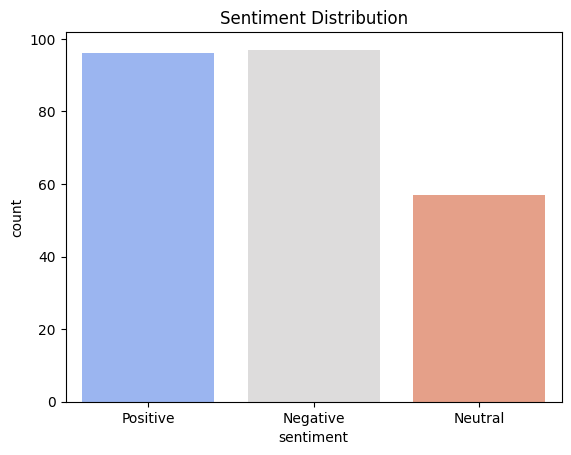

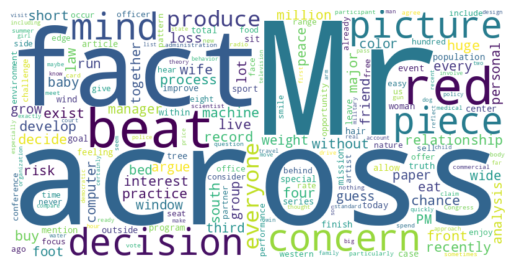

In [5]:
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:
X = df['review']
y = df['sentiment']

tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.42

Classification Report:
               precision    recall  f1-score   support

    Negative       0.46      0.55      0.50        20
     Neutral       0.00      0.00      0.00        12
    Positive       0.38      0.56      0.45        18

    accuracy                           0.42        50
   macro avg       0.28      0.37      0.32        50
weighted avg       0.32      0.42      0.36        50



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


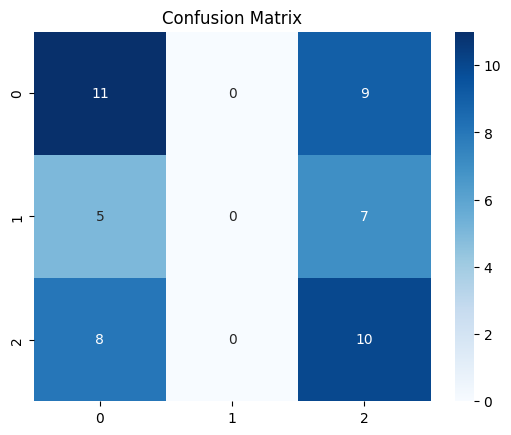

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [8]:
sample = ["ChatGPT is very helpful and user-friendly!"]
sample_tfidf = tfidf.transform(sample)
print("Predicted Sentiment:", model.predict(sample_tfidf)[0])


Predicted Sentiment: Negative
